In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\Titanic.csv.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

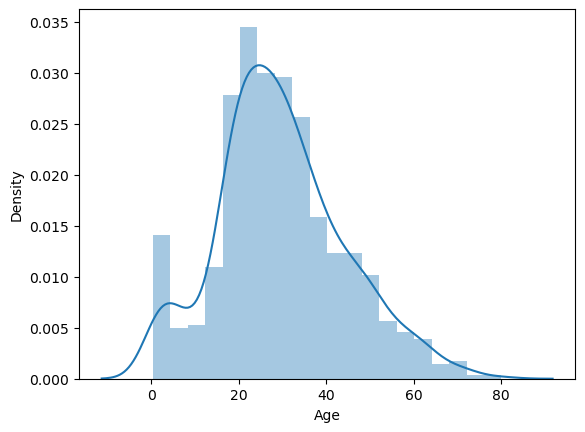

In [4]:
sns.distplot(df['Age'].dropna())

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

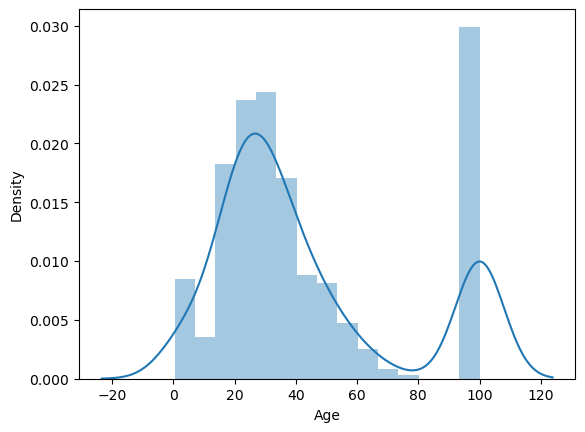

In [5]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of Passengers')

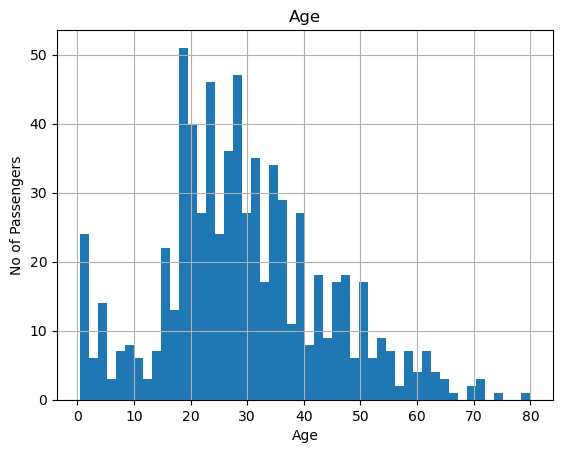

In [7]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

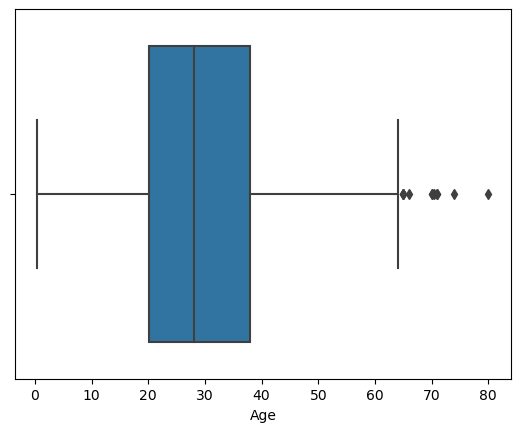

In [8]:
sns.boxplot(df['Age'])

#### With respect to gaussian or normal distribution we use this technique

In [9]:
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print(upper_boundary),print(lower_boundary),print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


(None, None, None)

In [11]:
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [12]:
upper_bridge=df.Age.quantile(0.75)+IQR*1.5
upper_bridge

64.8125

In [14]:
lower_bridge=df.Age.quantile(0.25)-IQR*1.5
lower_bridge

-6.6875

##### when data is skewed

Text(0, 0.5, 'No of Passengers')

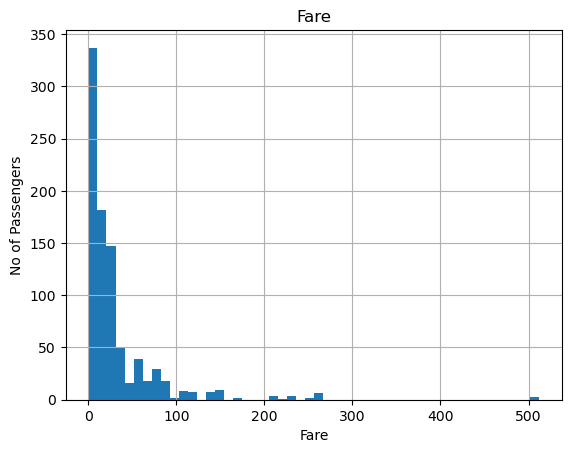

In [15]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

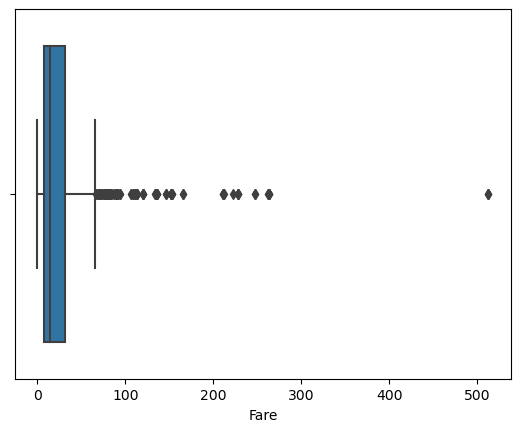

In [20]:
sns.boxplot(df['Fare'])

In [17]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [18]:
upper_bridge=df.Fare.quantile(0.75)+IQR*3
lower_bridge=df.Fare.quantile(0.25)-IQR*3
print(upper_bridge),print(lower_bridge)

100.2688
-61.358399999999996


(None, None)

In [21]:
df.loc[df['Age']>=73,'Age']=73
df.loc[df['Fare']>=100,'Fare']=100

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of Passengers')

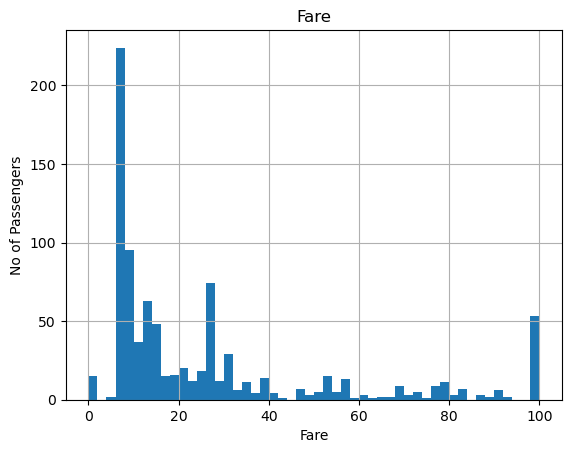

In [23]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.30,random_state=40)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier

LogisticRegression()

In [30]:
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred
y_pred1=classifier.predict_proba(X_test)
y_pred1

array([[0.73341334, 0.26658666],
       [0.72834322, 0.27165678],
       [0.63797677, 0.36202323],
       [0.49593745, 0.50406255],
       [0.72972823, 0.27027177],
       [0.71379013, 0.28620987],
       [0.72078008, 0.27921992],
       [0.72457774, 0.27542226],
       [0.70467258, 0.29532742],
       [0.20943669, 0.79056331],
       [0.60210262, 0.39789738],
       [0.22999986, 0.77000014],
       [0.70427831, 0.29572169],
       [0.6423418 , 0.3576582 ],
       [0.74037956, 0.25962044],
       [0.58876834, 0.41123166],
       [0.71825981, 0.28174019],
       [0.70218391, 0.29781609],
       [0.72279987, 0.27720013],
       [0.64581418, 0.35418582],
       [0.69999444, 0.30000556],
       [0.4764104 , 0.5235896 ],
       [0.65206259, 0.34793741],
       [0.70088424, 0.29911576],
       [0.25259387, 0.74740613],
       [0.61182139, 0.38817861],
       [0.33633325, 0.66366675],
       [0.69999444, 0.30000556],
       [0.67011717, 0.32988283],
       [0.70079783, 0.29920217],
       [0.

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6716417910447762
[[137  19]
 [ 69  43]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model

RandomForestClassifier()

In [36]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.664179104477612
